In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.linalg as LA
import numpy as np

from model import *
from Simulator import *

## visualizing

In [2]:
models=[
    {'name': SSP, 'kwargs': {'incongruency': 'random'}}, 
    {'name': DSTP, 'kwargs': {'incongruency': 'random'}}
]
dataset = SSP_DDM_Dataset(n_obs=20, length=1000, models=models)
dataloader = DataLoader(dataset, batch_size=100)
for i ,(m,p,x) in enumerate(dataloader):
    break


In [14]:
x0 = x[m[:,1].bool()] # 0 ssp, 1 dstp

x1 = x0[x0[:,:,1]==1][:,0]
x2 = x0[x0[:,:,1]==0][:,0]
x_inc_c = x1[x1>0].reshape(-1).numpy()
x_inc_inc = -x1[x1<0].reshape(-1).numpy()
x_c_c = x2[x2>0].reshape(-1).numpy()
x_c_inc = -x2[x2<0].reshape(-1).numpy()
import pandas as pd
import seaborn as sns
data_x = pd.DataFrame({
    "type": \
        len(x_inc_c)*['incong, correct'] + \
        len(x_inc_inc)*['incong, incorrect'] + \
        len(x_c_c)*['cong, correct'] + \
        len(x_c_inc)*['cong, incorrect'],
    "RTs":
        np.concatenate([x_inc_c, x_inc_inc, x_c_c, x_c_inc])
})

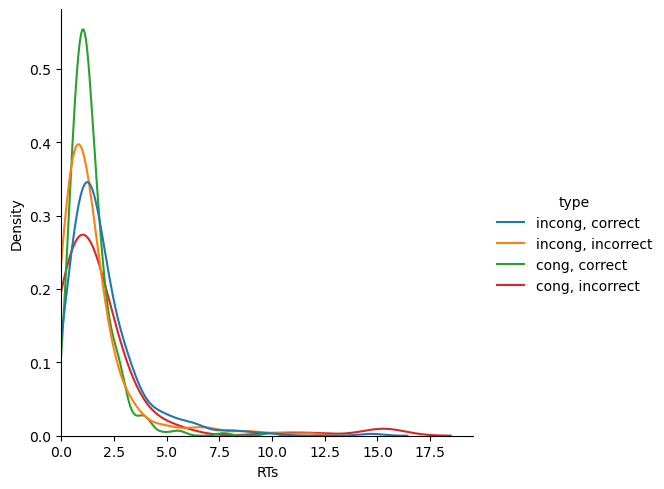

In [15]:
g = sns.displot(data=data_x, x="RTs", hue="type", kind='kde', common_norm=False)
g.set(xlim=0)
g.figure.show()

In [16]:
x0 = x[m[:,0].bool()] # 0 ssp, 1 dstp

x1 = x0[x0[:,:,1]==1][:,0]
x2 = x0[x0[:,:,1]==0][:,0]
x_inc_c = x1[x1>0].reshape(-1).numpy()
x_inc_inc = -x1[x1<0].reshape(-1).numpy()
x_c_c = x2[x2>0].reshape(-1).numpy()
x_c_inc = -x2[x2<0].reshape(-1).numpy()
import pandas as pd
import seaborn as sns
data_x = pd.DataFrame({
    "type": \
        len(x_inc_c)*['incong, correct'] + \
        len(x_inc_inc)*['incong, incorrect'] + \
        len(x_c_c)*['cong, correct'] + \
        len(x_c_inc)*['cong, incorrect'],
    "RTs":
        np.concatenate([x_inc_c, x_inc_inc, x_c_c, x_c_inc])
})

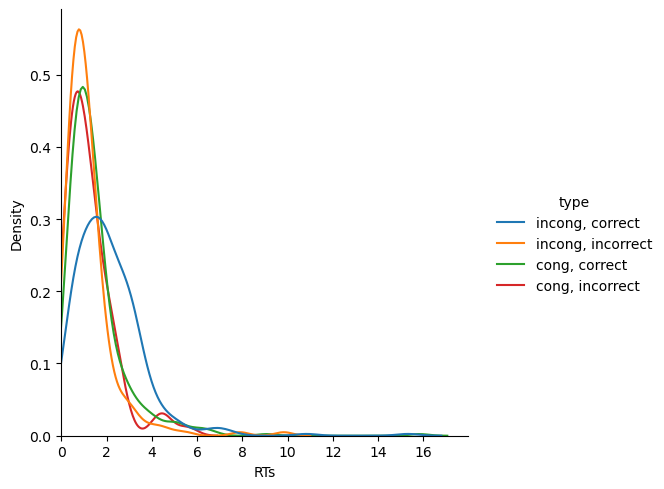

In [17]:
g = sns.displot(data=data_x, x="RTs", hue="type", kind='kde', common_norm=False)
g.set(xlim=0)
g.figure.show()

In [30]:
models=[
    {'name': SSP, 'kwargs': {'incongruency': 'random'}}, 
    # {'name': DSTP, 'kwargs': {'incongruency': 'random'}}
]
dataset = SSP_DDM_Dataset(n_obs=1000, length=1, models=models)
dataloader = DataLoader(dataset, batch_size=1)
for i ,(m,p,x) in enumerate(dataloader):
    break


In [31]:
x0 = x[m[:,0].bool()] # 0 ssp, 1 dstp

x1 = x0[x0[:,:,1]==1][:,0]
x2 = x0[x0[:,:,1]==0][:,0]
x_inc_c = x1[x1>0].reshape(-1).numpy()
x_inc_inc = -x1[x1<0].reshape(-1).numpy()
x_c_c = x2[x2>0].reshape(-1).numpy()
x_c_inc = -x2[x2<0].reshape(-1).numpy()
import pandas as pd
import seaborn as sns
data_x = pd.DataFrame({
    "type": \
        len(x_inc_c)*['incong, correct'] + \
        len(x_inc_inc)*['incong, incorrect'] + \
        len(x_c_c)*['cong, correct'] + \
        len(x_c_inc)*['cong, incorrect'],
    "RTs":
        np.concatenate([x_inc_c, x_inc_inc, x_c_c, x_c_inc])
})

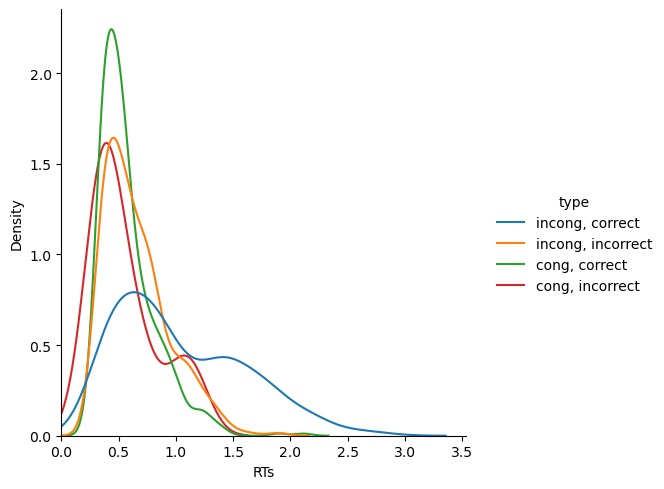

In [32]:
g = sns.displot(data=data_x, x="RTs", hue="type", kind='kde', common_norm=False)
g.set(xlim=0)
g.figure.show()

In [27]:
models=[
    # {'name': SSP, 'kwargs': {'incongruency': 'random'}}, 
    {'name': DSTP, 'kwargs': {'incongruency': 'random'}}
]
dataset = SSP_DDM_Dataset(n_obs=1000, length=1, models=models)
dataloader = DataLoader(dataset, batch_size=1)
for i ,(m,p,x) in enumerate(dataloader):
    break


In [28]:
x0 = x[m[:,0].bool()] # 0 ssp, 1 dstp

x1 = x0[x0[:,:,1]==1][:,0]
x2 = x0[x0[:,:,1]==0][:,0]
x_inc_c = x1[x1>0].reshape(-1).numpy()
x_inc_inc = -x1[x1<0].reshape(-1).numpy()
x_c_c = x2[x2>0].reshape(-1).numpy()
x_c_inc = -x2[x2<0].reshape(-1).numpy()
import pandas as pd
import seaborn as sns
data_x = pd.DataFrame({
    "type": \
        len(x_inc_c)*['incong, correct'] + \
        len(x_inc_inc)*['incong, incorrect'] + \
        len(x_c_c)*['cong, correct'] + \
        len(x_c_inc)*['cong, incorrect'],
    "RTs":
        np.concatenate([x_inc_c, x_inc_inc, x_c_c, x_c_inc])
})

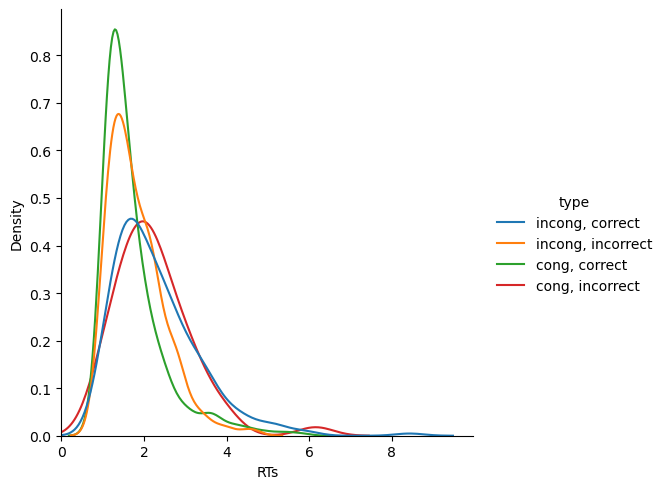

In [29]:
g = sns.displot(data=data_x, x="RTs", hue="type", kind='kde', common_norm=False)
g.set(xlim=0)
g.figure.show()

# training

In [7]:
models=[
    {'name': SSP, 'kwargs': {'incongruency': 'random'}}, 
    {'name': DSTP, 'kwargs': {'incongruency': 'random'}}
]
f_n_obs = np.random.choice([10 + i for i in range(200)])
dataset = SSP_DDM_Dataset(n_obs=f_n_obs, length=1000, models=models)
dataloader = DataLoader(dataset, batch_size=10)

In [8]:
in_chn, equiv_dim, inv_dim, evid_dim = 2, 128, 128, 128
summary_net = InvariantNetwork(in_chn, equiv_dim, inv_dim)
evidential_net = EvidentialNetwork(inv_dim + 1, evid_dim, n_models=2)

In [9]:
(sum([p.numel() for p in summary_net.parameters()]),
sum([p.numel() for p in evidential_net.parameters()]))

(264704, 49922)

In [5]:
params = torch.load('ckpt_ssp2dstp.pth')
summary_net.load_state_dict(params['summary_net'])
evidential_net.load_state_dict(params['evidential_net'])

<All keys matched successfully>

In [10]:
device = 'cuda:3'
summary_net = summary_net.to(device)
evidential_net = evidential_net.to(device)

In [11]:
epoch = 16
lr = 1e-4
from torch.optim import Adam
optimizer = Adam([
    {'params': summary_net.parameters()},
    {'params': evidential_net.parameters()}
], lr=lr)
lamb = 0.1

In [13]:
rec_loss = []
rec_acc = []
for i_epoch in range(epoch):
    for i ,(m,p,x) in enumerate(dataloader):
        m = m.to(device)
        x = x.to(device)
        
        optimizer.zero_grad()

        alpha = evidential_net(summary_net(x))

        l1 = loss_cls(alpha, m)
        l2 = loss_kl(alpha, m)
        l = l1 + lamb * l2

        l.backward()
        optimizer.step()

        rec_loss.append(l.item())
        rec_acc.append(((alpha.argmax(dim=-1)==m.argmax(dim=-1)).float().sum() / alpha.shape[0]).item())

        # if i % 100 == 99:
        #     print(l.item(), l1.item(), l2.item())

    if 1:
        print(f"epoch {i_epoch}:, {sum(rec_loss) / len(rec_loss): 6.4f}, {sum(rec_acc) / len(rec_acc): 6.4f}")
        rec_loss = []
        rec_acc = []
        torch.save({
            'summary_net': summary_net.state_dict(),
            'evidential_net': evidential_net.state_dict()
            }, 'ckpt_ssp2dstp.pth')


epoch 0:,  6.6108,  0.5720
epoch 1:,  6.6998,  0.5650
epoch 2:,  6.6878,  0.5840
epoch 3:,  6.7470,  0.5620
epoch 4:,  6.6100,  0.5830
epoch 5:,  6.4664,  0.5990
epoch 6:,  6.5975,  0.5990
epoch 7:,  6.6204,  0.5860
epoch 8:,  6.5181,  0.6040
epoch 9:,  6.5950,  0.5670
epoch 10:,  6.6398,  0.5990
epoch 11:,  6.5746,  0.5800
epoch 12:,  6.5747,  0.6020
epoch 13:,  6.5437,  0.5850
epoch 14:,  6.4920,  0.6170
epoch 15:,  6.6809,  0.5610
